In [57]:
import pandas as pd
import plotly.express as px
import missingno as msno
import matplotlib.pyplot as plt

In [58]:
features = pd.read_csv('../data/features_data_set.csv')
sales = pd.read_csv('../data/sales_data_set.csv')
stores = pd.read_csv('../data/stores_data_set.csv')
features.head()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [59]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [13]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [14]:
data = pd.merge(features,sales, on = ['Store','Date','IsHoliday'], how='inner')

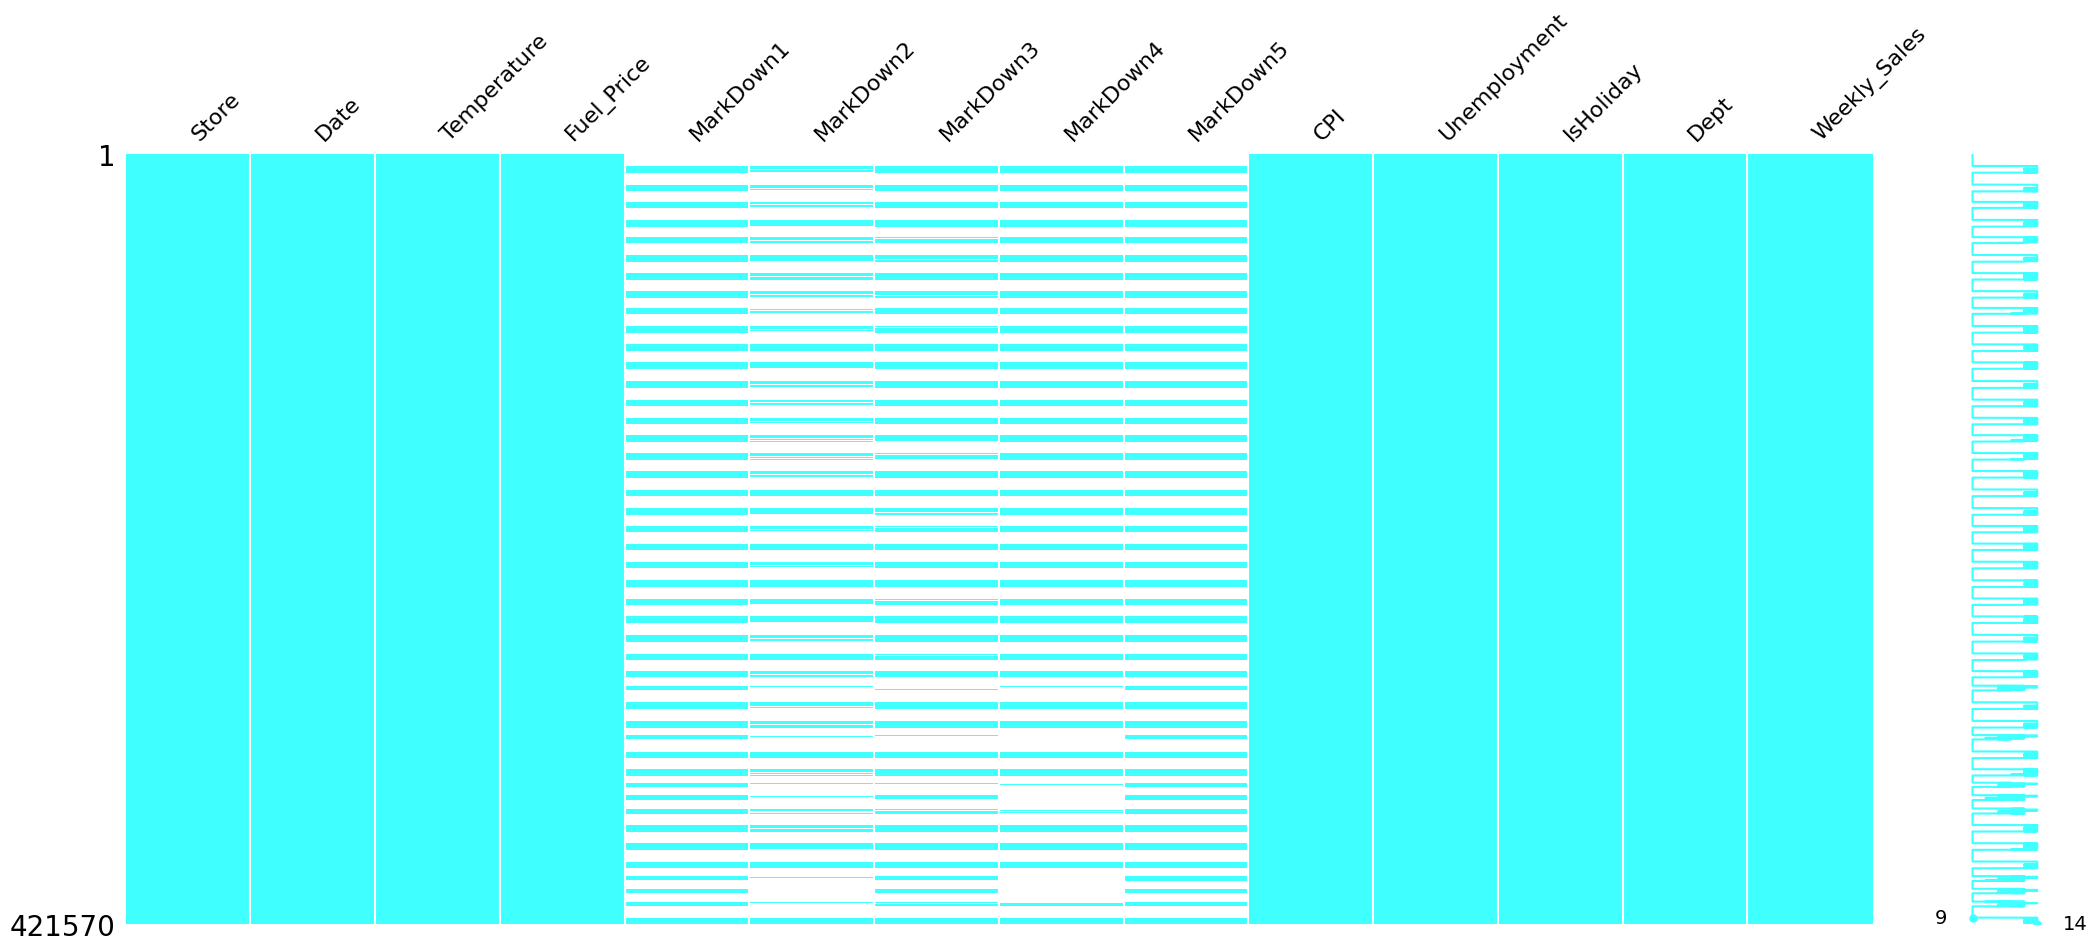

In [15]:
msno.matrix(data,figsize=(25, 10),
    width_ratios=(15, 1),
    color=(0.25,1.0 ,1.0),    fontsize=16,
    labels=None,
    label_rotation=45,
    sparkline=True,)
plt.show()

In [16]:
data['Date'] = pd.to_datetime(data['Date'], format = '%d/%m/%Y')

In [17]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [18]:
t = data.groupby('Date')['Weekly_Sales'].sum().reset_index()
fig = px.line(t, x='Date', y = 'Weekly_Sales',title="Weekly sales sum over the years")
fig.update_yaxes(categoryorder='total ascending',title="Weekly sales sum",
    showgrid=True, gridcolor='lightgray', gridwidth=1)
fig.update_xaxes(categoryorder='total descending',
    showgrid=True, gridcolor='lightgray', gridwidth=1,title="Date")
fig.show()

In [19]:
t = data.groupby(['Date','IsHoliday'])['Weekly_Sales'].sum().reset_index()
fig = px.scatter(t, x='Date', y = 'Weekly_Sales',color='IsHoliday',title="Weekly sales with holidays")
fig.update_yaxes(categoryorder='total ascending',title="Weekly sales sum",
    showgrid=True, gridcolor='lightgray', gridwidth=1)
fig.update_xaxes(categoryorder='total descending',
    showgrid=True, gridcolor='lightgray', gridwidth=1,title="Date")
fig.show()

In [20]:
b = data.groupby(['Dept','Year'], as_index=False)['Weekly_Sales'].sum().reset_index()
b['Year'] = b['Year'].astype(str)
fig2 = px.bar(b, x='Dept', y = 'Weekly_Sales',color='Year',text='Dept',title="Weekly sales according to department and year")
fig2.update_yaxes(categoryorder='total ascending',title="Weekly sales sum",
    showgrid=True, gridcolor='lightgray', gridwidth=1)
fig2.update_xaxes(categoryorder='total descending',
    showgrid=True, gridcolor='lightgray', gridwidth=1,title="Department")
fig2.update_traces(
    textposition='outside',
    textfont=dict(
        size=32,
        color='black'
    )
)
fig2.show()

In [21]:
data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Year,Month,Day
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,2010,2,5
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,2010,2,5
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,2010,2,5
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,2010,2,5
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,2010,2,5


In [22]:
dept_sales = data.groupby('Dept').agg(
    sales=('Weekly_Sales', 'sum'),
    #size=('Size', 'mean'),
).sort_values(by='sales', ascending=False).reset_index().head(10)
dept_sales


,Dept,sales
0,92,4.839433e+08
1,95,4.493202e+08
2,38,3.931181e+08
3,72,3.057252e+08
4,90,2.910685e+08
5,40,2.889360e+08
6,2,2.806112e+08
7,91,2.167817e+08
8,13,1.973216e+08
9,8,1.942808e+08


In [23]:
top_depts = dept_sales.sort_values(by='sales', ascending=False)
top_depts['Dept'] = top_depts['Dept'].astype(str)
top_depts['Dept'] = pd.Categorical(top_depts['Dept'], categories=top_depts['Dept'], ordered=True)

In [24]:
fig= px.bar(top_depts,x='Dept',y = 'sales')
fig.update_yaxes(categoryorder='total ascending',
    showgrid=True, gridcolor='lightgray', gridwidth=1, title="Weekly sales sum",)
fig.update_xaxes(showgrid=True, gridcolor='lightgray',
    title="Department"
)
fig.update_layout(
    title={
        "text": "Top departments by weekly sales"
        }
)
fig.show()

In [25]:
dept_sales = data.groupby('Dept').agg(
    sales=('Weekly_Sales', 'sum'),
    #size=('Size', 'mean'),
).sort_values(by='sales', ascending=False).reset_index().tail(5)
dept_sales

,Dept,sales
76,51,30572.83
77,78,1714.71
78,39,177.98
79,43,14.32
80,47,-4962.93


In [26]:
top_depts = dept_sales.sort_values(by='sales', ascending=False)
top_depts['Dept'] = top_depts['Dept'].astype(str)

In [27]:
fig= px.bar(top_depts,x='Dept',y = 'sales')
fig.update_yaxes(categoryorder='total ascending',
    showgrid=True, gridcolor='lightgray', gridwidth=1, title="Weekly sales sum",)
fig.update_xaxes(showgrid=True, gridcolor='lightgray',
    title="Department"
)
fig.update_layout(
    title={
        "text": "Worst 5 departments by weeakly sales",
        }
)
fig.show()

In [28]:
sales_stores = pd.merge(sales,stores, on='Store', how='inner')

In [29]:
sales_stores['Date'] = pd.to_datetime(sales_stores['Date'], format = '%d/%m/%Y')
sales_stores['Year'] = sales_stores['Date'].dt.year
sales_stores['Month'] = sales_stores['Date'].dt.month
sales_stores['Day'] = sales_stores['Date'].dt.day

In [30]:
sales_stores.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Year,Month,Day
0,1,1,2010-02-05,24924.50,False,A,151315,2010,2,5
1,1,1,2010-02-12,46039.49,True,A,151315,2010,2,12
2,1,1,2010-02-19,41595.55,False,A,151315,2010,2,19
3,1,1,2010-02-26,19403.54,False,A,151315,2010,2,26
4,1,1,2010-03-05,21827.90,False,A,151315,2010,3,5


In [31]:
type_sales = sales_stores.groupby(['Type','IsHoliday'])['Weekly_Sales'].sum().reset_index()

In [32]:
fig2 = px.bar(type_sales, x='Type', y = 'Weekly_Sales',color='IsHoliday',title="Weekly sales across type of stores")
fig2.update_yaxes(categoryorder='total ascending',
    showgrid=True, gridcolor='lightgray', gridwidth=1,title="Weekly sales")
fig2.update_xaxes(
    showgrid=True, gridcolor='lightgray', gridwidth=1,title="Type")
fig2.show()

In [33]:
dep_92 = sales_stores[sales_stores['Dept'] == 92]
dep_92

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Year,Month,Day
9227,1,92,2010-02-05,139884.94,False,A,151315,2010,2,5
9228,1,92,2010-02-12,143081.42,True,A,151315,2010,2,12
9229,1,92,2010-02-19,135066.75,False,A,151315,2010,2,19
9230,1,92,2010-02-26,125048.08,False,A,151315,2010,2,26
9231,1,92,2010-03-05,132945.44,False,A,151315,2010,3,5
...,...,...,...,...,...,...,...,...,...,...
420865,45,92,2012-09-28,47372.08,False,B,118221,2012,9,28
420866,45,92,2012-10-05,50301.74,False,B,118221,2012,10,5
420867,45,92,2012-10-12,52360.65,False,B,118221,2012,10,12
420868,45,92,2012-10-19,48108.38,False,B,118221,2012,10,19


In [34]:
sales_dep_92 = dep_92.groupby('Store').agg(
    sales=('Weekly_Sales', 'sum'),
    size=('Size', 'mean'),
).sort_values(by='sales', ascending=False)
s_d_1 = sales_dep_92.reset_index().head(10)
s_d_1['Store'] = s_d_1['Store'].astype(str)
s_d_1

,Store,sales,size
0,14,26101497.71,200898.0
1,2,23572153.03,202307.0
2,20,23542625.04,203742.0
3,13,23170876.20,219622.0
4,4,22789210.43,205863.0
5,27,20952094.22,204184.0
6,1,19370632.64,151315.0
7,31,18162446.96,203750.0
8,24,17429136.57,203819.0
9,41,16563355.96,196321.0


In [35]:
fig2 = px.bar(s_d_1, x='Store', y = 'sales',color='size')
fig2.update_yaxes(title = 'Weekly Sales sum',
    showgrid=True, gridcolor='lightgray', gridwidth=1)
fig2.update_xaxes(title = 'Store',
    showgrid=True, gridcolor='lightgray', gridwidth=1)
fig2.update_layout(
    title={
        "text": "Department 92 Top 10 stores by sales and their size",
        "font": {
            "size": 24,
            "color": "black"
        }
        }
)
fig2.show()

In [36]:
dep_47 = sales_stores[sales_stores['Dept'] == 47]
dep_47

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Year,Month,Day
6047,1,47,2010-02-05,70.00,False,A,151315,2010,2,5
6048,1,47,2010-02-19,-863.00,False,A,151315,2010,2,19
6049,1,47,2010-03-12,-698.00,False,A,151315,2010,3,12
6050,1,47,2010-04-09,14.00,False,A,151315,2010,4,9
6051,1,47,2010-10-08,-58.00,False,A,151315,2010,10,8
...,...,...,...,...,...,...,...,...,...,...
417808,45,47,2011-05-13,20.00,False,B,118221,2011,5,13
417809,45,47,2011-11-18,-24.00,False,B,118221,2011,11,18
417810,45,47,2011-12-23,95.00,False,B,118221,2011,12,23
417811,45,47,2012-08-03,224.00,False,B,118221,2012,8,3


In [37]:
sales_dep_92 = dep_47.groupby('Store').agg(
    sales=('Weekly_Sales', 'sum'),
    size=('Size', 'mean'),
).sort_values(by='sales', ascending=False)
s_d_1 = sales_dep_92.reset_index().tail(10)
s_d_1['Store'] = s_d_1['Store'].astype(str)
s_d_1

,Store,sales,size
27,20,-378.58,203742.0
28,23,-551.50,114533.0
29,6,-756.42,202505.0
30,34,-947.03,158114.0
31,12,-965.78,112238.0
32,16,-1039.08,57197.0
33,45,-1061.04,118221.0
34,10,-2329.00,126512.0
35,1,-2562.00,151315.0
36,35,-3567.18,103681.0


In [38]:
fig2 = px.bar(s_d_1, x='Store', y = 'sales',color='size')
fig2.update_yaxes(title = 'Weekly Sales sum',
    showgrid=True, gridcolor='lightgray', gridwidth=1)
fig2.update_xaxes(title = 'Store',
    showgrid=True, gridcolor='lightgray', gridwidth=1)
fig2.update_layout(
    title={
        "text": "Department 47 Worst 10 stores by sales",
        "font": {
            "size": 24,
            "color": "black"
        }
        }
)
fig2.show()

In [39]:
type_sales_2 = sales_stores.groupby(['Store','Size'])['Weekly_Sales'].sum().reset_index()


fig2 = px.scatter(type_sales_2, x='Size', y = 'Weekly_Sales',trendline='ols',color='Weekly_Sales',title='Correlation between store size and sales')
fig2.update_yaxes(
    showgrid=True, gridcolor='lightgray', gridwidth=1,title="Weekly sales")
fig2.update_xaxes(
    showgrid=True, gridcolor='lightgray', gridwidth=1,title="Size")
fig2.show()

In [40]:
features['IsHoliday'].value_counts()

IsHoliday
False    7605
True      585
Name: count, dtype: int64

In [41]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [42]:
features['Date'] = pd.to_datetime(features['Date'], format = '%d/%m/%Y')
features['Year'] = features['Date'].dt.year
features['Month'] = features['Date'].dt.month
features['Day'] = features['Date'].dt.day

In [43]:
features['Has_Markdown'] = features[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].notna().any(axis=1)


In [44]:
markdown_sales = features.groupby('Date').agg({'MarkDown1': 'mean', 'MarkDown2': 'mean', 'MarkDown3': 'mean', 'MarkDown4': 'mean', 'MarkDown5': 'mean','IsHoliday':'mean'}).reset_index()
markdown_sales = markdown_sales[markdown_sales['Date'] > '2011.11.01']
markdown_sales

,Date,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday
91,2011-11-04,NaN,NaN,NaN,NaN,NaN,0.0
92,2011-11-11,10732.220667,9031.857778,301.183864,4122.438378,4946.894444,0.0
93,2011-11-18,5998.128000,650.518864,114.090250,815.502895,5649.076667,0.0
94,2011-11-25,556.328636,209.536857,60007.649500,70.310286,1847.119556,1.0
95,2011-12-02,4384.038864,104.955484,3358.608667,3087.544865,17675.522222,0.0
...,...,...,...,...,...,...,...
177,2013-06-28,4905.673333,766.902703,23.950385,3831.422703,3771.952889,0.0
178,2013-07-05,8197.936444,2192.764054,626.819070,8357.932564,2389.641333,0.0
179,2013-07-12,3962.768444,1259.823947,71.435814,2322.072703,2891.560222,0.0
180,2013-07-19,2607.699333,924.923158,142.733000,1034.775526,1893.073333,0.0


In [45]:
import plotly.graph_objects as go

fig2 = go.Figure()


fig2.add_trace(go.Scatter(x=markdown_sales['Date'], y=markdown_sales['MarkDown1'],
                          mode='lines', name='MarkDown1'))
fig2.add_trace(go.Scatter(x=markdown_sales['Date'], y=markdown_sales['MarkDown2'],
                          mode='lines', name='MarkDown2'))
fig2.add_trace(go.Scatter(x=markdown_sales['Date'], y=markdown_sales['MarkDown3'],
                          mode='lines', name='MarkDown3'))
fig2.add_trace(go.Scatter(x=markdown_sales['Date'], y=markdown_sales['MarkDown4'],
                          mode='lines', name='MarkDown4'))
fig2.add_trace(go.Scatter(x=markdown_sales['Date'], y=markdown_sales['MarkDown5'],
                          mode='lines', name='MarkDown5'))



fig2.update_yaxes(showgrid=True, gridcolor='lightgray', gridwidth=1)
fig2.update_xaxes(showgrid=True, gridcolor='lightgray', gridwidth=1)
fig2.update_layout(
    title="Markdown promotions over time",
    xaxis_title="Date",
    yaxis_title="Value"
)

fig2.show()

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

markdown_sales['IsHoliday_Normalized'] = scaler.fit_transform(markdown_sales[['IsHoliday']])

markdown_sales['Year'] = markdown_sales['Date'].dt.year
unique_years = markdown_sales['Year'].unique()

fig2 = go.Figure()

colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A']

for i, col in enumerate(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']):
    fig2.add_trace(go.Scatter(x=markdown_sales['Date'], y=markdown_sales[col],
                              mode='lines', name=col, line=dict(color=colors[i])))

fig2.add_trace(go.Scatter(x=markdown_sales['Date'], y=markdown_sales['IsHoliday_Normalized'],
                          mode='lines', name='Holiday (Normalized)',
                          line=dict(dash='dash', color='#FF6692'), yaxis='y2'))

annotations = []
for year in unique_years:
    year_data = markdown_sales[markdown_sales['Year'] == year]
    midpoint = year_data['Date'].min() + (year_data['Date'].max() - year_data['Date'].min()) / 2
    
    annotations.append(dict(
        x=midpoint,
        y=1.1,
        xref="x",
        yref="paper",
        text=str(year),
        showarrow=False,
        font=dict(size=12, color="black"),
        align="center"
    ))

fig2.update_layout(
    title="MarkDown and Normalized Holiday Data",
    xaxis=dict(
        title="",
        showticklabels=False,
        showgrid=True,
        gridcolor='lightgray',
        zeroline=False,
    ),
    yaxis=dict(
        title="MarkDown Values",
        showgrid=True,
        gridcolor='lightgray',
        zeroline=True,
        zerolinecolor='lightgray',
    ),
    yaxis2=dict(
        title="Holiday (Normalized)",
        overlaying='y',
        side='right',
        showgrid=False,
        tickfont=dict(color='#FF6692'),
        titlefont=dict(color='#FF6692')
    ),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.2,
        xanchor="center",
        x=0.5
    ),
    annotations=annotations
)


fig2.show()

In [47]:
data['Date'] = pd.to_datetime(data['Date'], format = '%d/%m/%Y')
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [48]:
data['Has_Markdown'] = data[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].notna().any(axis=1)

In [49]:
markdown_sales2 = data.groupby(['Date']).agg({'MarkDown1': 'mean', 'MarkDown2': 'mean', 'MarkDown3': 'mean', 'MarkDown4': 'mean', 'MarkDown5': 'mean','IsHoliday':'mean','Weekly_Sales':'sum'}).reset_index()
markdown_sales2 = markdown_sales2[markdown_sales2['Date'] > '2011.11.01']
markdown_sales2.head()

,Date,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,Weekly_Sales
91,2011-11-04,NaN,NaN,NaN,NaN,NaN,0.0,48655544.30
92,2011-11-11,11445.650530,9651.876408,317.731020,4174.938448,4952.209369,0.0,48474224.75
93,2011-11-18,6317.023783,690.925021,117.909290,818.983472,5904.887670,0.0,46438980.56
94,2011-11-25,587.152547,213.626845,61817.075106,70.420365,1903.981198,1.0,66593605.26
95,2011-12-02,4630.538607,105.464073,3589.623724,3121.001309,18683.272846,0.0,49390556.49


In [50]:
fig2 = go.Figure()


fig2.add_trace(go.Scatter(x=markdown_sales2['Date'], y=markdown_sales2['MarkDown1'],
                          mode='lines', name='MarkDown1'))
fig2.add_trace(go.Scatter(x=markdown_sales2['Date'], y=markdown_sales2['MarkDown2'],
                          mode='lines', name='MarkDown2'))
fig2.add_trace(go.Scatter(x=markdown_sales2['Date'], y=markdown_sales2['MarkDown3'],
                          mode='lines', name='MarkDown3'))
fig2.add_trace(go.Scatter(x=markdown_sales2['Date'], y=markdown_sales2['MarkDown4'],
                          mode='lines', name='MarkDown4'))
fig2.add_trace(go.Scatter(x=markdown_sales2['Date'], y=markdown_sales2['MarkDown5'],
                          mode='lines', name='MarkDown5'))


fig2.update_yaxes(showgrid=True, gridcolor='lightgray', gridwidth=1)
fig2.update_xaxes(showgrid=True, gridcolor='lightgray', gridwidth=1)
fig2.update_layout(
    title="MarkDown promotion over time",
    xaxis_title="Date",
    yaxis_title="Value"
)

fig2.show()

In [51]:
scaler = MinMaxScaler()
markdown_sales_normalized = markdown_sales2.copy()

markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'IsHoliday', 'Weekly_Sales']
markdown_sales_normalized[markdown_columns] = scaler.fit_transform(markdown_sales2[markdown_columns])


line_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']


fig2 = go.Figure()


for i, col in enumerate(markdown_columns[:-2]):
    fig2.add_trace(go.Scatter(x=markdown_sales_normalized['Date'], y=markdown_sales_normalized[col],
                              mode='lines', name=col, line=dict(color=line_colors[i])))


fig2.add_trace(go.Scatter(x=markdown_sales_normalized['Date'], y=markdown_sales_normalized['IsHoliday'],
                          mode='lines', name='Holiday (Normalized)',
                          line=dict(dash='dash', color='#e377c2')))


fig2.add_trace(go.Bar(x=markdown_sales_normalized['Date'], y=markdown_sales_normalized['Weekly_Sales'],
                      name='Weekly Sales (Normalized)', opacity=0.5, marker_color='rgba(0, 123, 255, 0.5)'))

fig2.update_yaxes(showgrid=True, gridcolor='lightgray', gridwidth=1)
fig2.update_xaxes(showgrid=True, gridcolor='lightgray', gridwidth=1)
fig2.update_layout(
    title="Normalized MarkDown, Holiday, and Weekly Sales Data",
    xaxis_title="Date",
    yaxis_title="Normalized Value",
    barmode='overlay'
)


fig2.show()

In [52]:
data.dtypes

Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
Dept                     int64
Weekly_Sales           float64
Year                     int32
Month                    int32
Day                      int32
Has_Markdown              bool
dtype: object

In [53]:
data['Weekly_Sales'].isna().sum()

0

In [61]:
data['Weekly_Sales'] = pd.to_numeric(data['Weekly_Sales'], errors='coerce')

In [62]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Weekly_Sales'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

KeyboardInterrupt: 

18:23:47 - cmdstanpy - INFO - Chain [1] start processing
18:23:58 - cmdstanpy - INFO - Chain [1] done processing


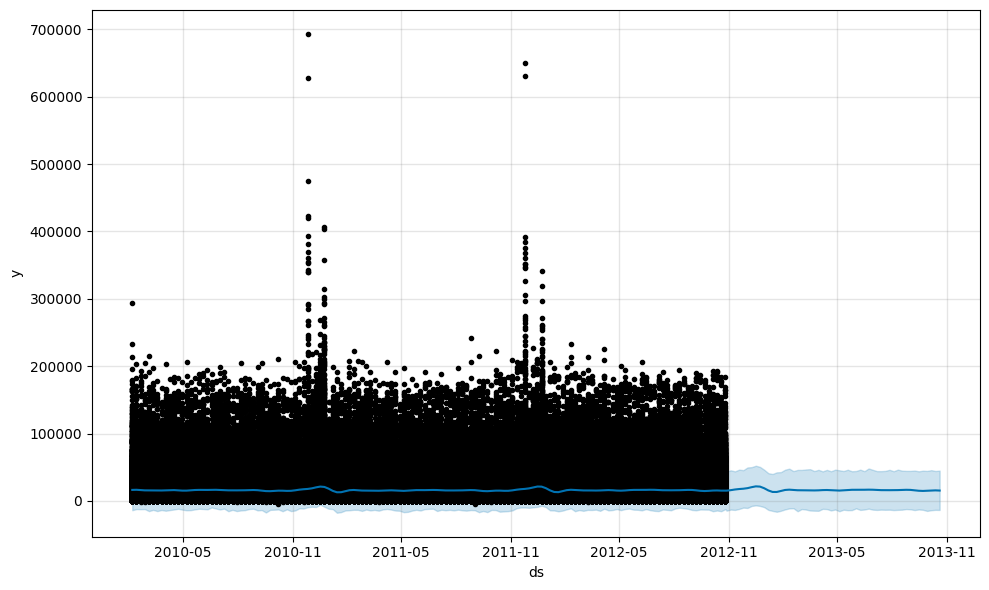

In [63]:
from prophet import Prophet


prophet_data = data.reset_index()[['Date', 'Weekly_Sales']].rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})


model = Prophet()
model.fit(prophet_data)


future = model.make_future_dataframe(periods=52, freq='W')
forecast = model.predict(future)


model.plot(forecast)
plt.show()

In [66]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(50))

            ds          yhat    yhat_lower    yhat_upper
145 2012-11-11  16986.888717 -13359.270094  43885.081464
146 2012-11-18  17674.346401 -11894.935218  46473.898254
147 2012-11-25  18140.013685  -9903.595515  45683.650558
148 2012-12-02  18986.768199 -10426.831457  49704.463511
149 2012-12-09  20436.819336  -7412.525446  50200.582025
150 2012-12-16  21647.426623  -6563.819097  52281.562547
151 2012-12-23  21269.478803  -7417.587909  50509.143426
152 2012-12-30  18846.358900  -9207.715777  46298.912535
153 2013-01-06  15552.681032 -13312.710170  41191.051167
154 2013-01-13  13347.965334 -14783.957679  40025.839836
155 2013-01-20  13308.358247 -16093.049126  42440.611928
156 2013-01-27  14803.717994 -14609.808897  42790.064093
157 2013-02-03  16280.231204 -12570.197001  46376.191093
158 2013-02-10  16728.375694 -11093.247066  47935.650947
159 2013-02-17  16334.464801 -10802.562955  44328.212260
160 2013-02-24  15869.716871 -15303.454424  46061.354013
161 2013-03-03  15739.137125 -1